In [1]:
import pandas as pd 
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from enhort_analysis import enhort_analysis

## -Method-

### Data Exploration
In this section, we will have our first glimpse on our datasets. The actions we are going to take are: 
    1. Basic Statistics about the data
    2. Find and eliminate missing value
    3. Check abnormal data format

In [2]:
eh_analysis_01 = enhort_analysis()

#### Basic Data Statistics 
In this section, we will know about the characters(the columns name), and mean, standard deviation, min&max and the quantile of the numeric data.

In [3]:
eh_analysis_01.as_tf_data.head()

,id,user_id,amount,created_at
0,606464,315270,200.0,2016-08-17 15:15:43.815
1,606467,324684,25.0,2016-08-17 20:07:08.170
2,606468,296626,10.0,2016-08-17 15:16:01.211
3,606470,409550,5.0,2016-08-17 15:16:02.333
4,607384,330457,5.0,2016-08-17 15:43:26.392


In [4]:
eh_analysis_01.as_tf_data.describe()

,id,user_id,amount
count,1.059050e+05,105905.000000,105905.000000
mean,9.154170e+05,314386.310741,23.475960
std,3.552217e+05,50151.151487,53.163274
min,2.913770e+05,637.000000,5.000000
25%,6.174360e+05,285325.000000,5.000000
50%,8.502560e+05,311917.000000,10.000000
75%,1.199237e+06,341307.000000,25.000000
max,1.668805e+06,414163.000000,7090.000000


In [5]:
eh_analysis_01.user_data.head()

,id,account_state,risk_level,date_of_birth,state,zipcode,platform,created_at
0,329581,complete,2,1987-06-29,CA,95037,android,2016-07-13 14:44:29.976171
1,396,complete,2,1990-08-17,KY,42001,android,2016-07-09 10:19:22.346926
2,2131,complete,2,1987-03-27,PA,17856,ios,2016-07-02 15:20:59.104448
3,330605,complete,1,1996-04-04,IN,46033,ios,2016-07-13 21:53:57.922888
4,330616,complete,3,1983-10-04,CA,92114,android,2016-07-13 21:54:05.984380


In [6]:
eh_analysis_01.user_data.describe()

,id,risk_level,zipcode
count,54797.000000,54797.000000,54797.000000
mean,318873.918992,1.703706,50563.281840
std,50681.882479,0.550259,29981.693518
min,396.000000,1.000000,3.000000
25%,288714.000000,1.000000,27409.000000
50%,317576.000000,2.000000,46112.000000
75%,348906.000000,2.000000,78259.000000
max,414198.000000,3.000000,99901.000000


#### Missing Value
The data that is given to the project is well-processed, but the checking for missing value is a regular process to guarantee that we have no missing value isusse in the further steps.

In [7]:
all(eh_analysis_01.user_data.isnull() == False)

True

In [8]:
all(eh_analysis_01.as_tf_data.isnull() == False)

True

As expected, we see no missing value in the dataset

#### Abnormal Data Type
Abnormal data type means that a column contained more than one data dtype. In order to check for abnormal data, we can take a look at the data type of each column. We further explore the columns with object data type since object data type can contain only string data or more than two data types.

In [9]:
print("***Auto Stash Transfer User Data types*** ")
print(eh_analysis_01.as_tf_data.dtypes)
print("\n ***Stash User Data types***")
print(eh_analysis_01.user_data.dtypes)

***Auto Stash Transfer User Data types*** 
id                     int64
user_id                int64
amount               float64
created_at    datetime64[ns]
dtype: object

 ***Stash User Data types***
id                        int64
account_state            object
risk_level                int64
date_of_birth    datetime64[ns]
state                    object
zipcode                   int64
platform                 object
created_at       datetime64[ns]
dtype: object


In [10]:
state_is_str = all(eh_analysis_01.user_data.state.apply(lambda x:type(x) == str))
account_state_is_str = all(eh_analysis_01.user_data.account_state.apply(lambda x:type(x) == str))
platform_is_str = all(eh_analysis_01.user_data.platform.apply(lambda x:type(x) == str))

In [11]:
if state_is_str and account_state_is_str and platform_is_str:
    print("All the object type columns in the dataset contain only string value. ")

All the object type columns in the dataset contain only string value. 


As we can see from the result above, all the columns have no abnormal data type and the data type contained in the dataset are integer, float, str and date time. 

### Data Mining
In this section, we will put the users into obervation groups according to specific conditions. The conditions we apply in this project are: 
    1. The weeks when the accounts were created
    2. Ages of the users (when users create accounted)
    3. The resident state of the users
The statistics we are about to calculate are: 
    1. What percentage of each cohort has made an Auto-Stash transfer?
    2. For users who have made an Auto-Stash transfer, what is the average number of transfers made?
    3. For users who have made an Auto-Stash transfer, what is the average frequency of transfers in days?
    4. For users who have made an Auto-Stash transfer, what is the average increase in dollar value from one transfer to the next?

Besides the questions above, we will also calculate the churn rate of the users, who create the account in the same week. At the end of this section, we will use some mechine learning and data visualization tool to explain what characters of customers would choose auto stash transfer are, and what characters of customers would stop using auto stash transfer after using auto stash transfer are.

Let's explore about what the percentage of users decide to make stash auto transfer (** Question 1 **)

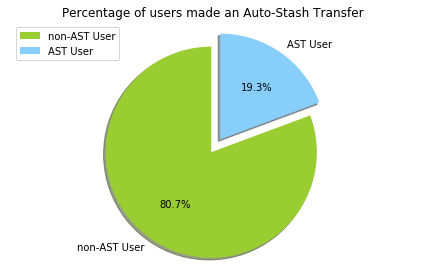

In [12]:
pert_mk_ato_stsh = eh_analysis_01.percentage_allusers_mk_ast()
plt.pie(
    (1-pert_mk_ato_stsh,pert_mk_ato_stsh),
    labels=('non-AST User','AST User'),
    shadow=True,
    colors=('yellowgreen', 'lightskyblue'),
    explode=(0,0.15), # space between slices 
    startangle=90,    
    autopct='%1.1f%%',# display fraction as percentage
    )
plt.title('Percentage of users made an Auto-Stash Transfer')
plt.legend(fancybox=True)
plt.axis('equal')   
plt.tight_layout()
plt.show()


As we can see from the pie graph above, we find that around 19% of all the users made have made auto stash transfer. 

Next, we are going to group the users by the weeks they create their accounts **( Question 2 )**. In order to define the week interval, we need to know the earliest date an account created, and the last date an account created in the user info dataset. 

In [13]:
eh_analysis_01.define_date_gap()

 The least recent recorded date: '' 2016-06-01 00:00:44.881751
 The most recent recorded date: '' 2016-07-31 23:59:51.037508

 The weekly gap:
[Timestamp('2016-06-01 00:00:00'), Timestamp('2016-06-06 00:00:00'), Timestamp('2016-06-13 00:00:00'), Timestamp('2016-06-20 00:00:00'), Timestamp('2016-06-27 00:00:00'), Timestamp('2016-07-04 00:00:00'), Timestamp('2016-07-11 00:00:00'), Timestamp('2016-07-18 00:00:00'), Timestamp('2016-07-25 00:00:00'), Timestamp('2016-08-01 00:00:00')]


Here, there is one thing needed to be pointed out. Since we use **Gregorian calendar** in this project, we need to make sure that the very first day of a week is Monday, and the last day is Sunday. In the dataset, the earliest date an account created was Wednesday, so the first week interval only has five days. In addition, the lastest date a account created is 07/31/2016, so the the last week interval should end before '2016-08-01 00:00:00'. 

This function below will group users by week intervals we created, save the grouped into a class instance, called 'user_id_by_parameter'. 

In [14]:
eh_analysis_01.gp_user_by_created_wk()

The graph below presents the number of users in each enhort. The reason why we need to have an expression how approximately the users distribute among the week interval is that all the calculation in the following sessions is estabilished on each enhort, and the precentages presented in the following sessions state the fact based on the number of users in each enhort. 

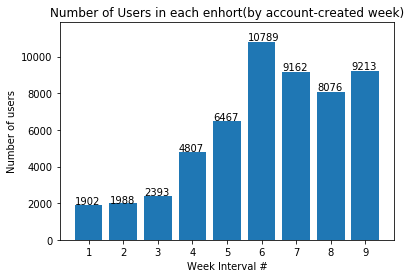

In [15]:
num_ast_enhortly = []
for i in range(len(eh_analysis_01.user_id_by_parameter)):
    num_ast_enhortly.append(len(eh_analysis_01.user_id_by_parameter[i][1]))
f,ax = plt.subplots()    
plt = eh_analysis_01.make_bar_plot(num_ast_enhortly)
plt.xlabel('Week Interval #')
plt.ylabel('Number of users')
plt.title("Number of Users in each enhort(by account-created week)")
plt.show()

After getting the group of users, let's calculate the percentage of users in each cohort, who made auto-stash transfer **(Question 2a)** . We will call a function called 'percentage_user_mk_ast' to perform the task, and the result will be presented in the bar graph. 

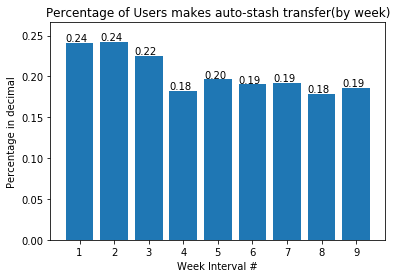

In [16]:
# Question 2a
pert_by_wk  = eh_analysis_01.percentage_user_mk_ast()
plt = eh_analysis_01.make_bar_plot(pert_by_wk)
plt.xlabel('Week Interval #')
plt.ylabel('Percentage in decimal')
plt.title("Percentage of Users makes auto-stash transfer(by week)")
plt.show()

As we can see from the graph, we can tell that the trend that the precentage of users used auto-stash transfer as the time went is downward. However, due to the number of users in week interval 6,7,8 and 9 are much larger than that in week interval 1,2,3 and 4, so the number of users used auto-stash transfer is increased as the time went. In summary, the percentage of users, who used auto-stash transfer, decreased, but the number of users used auto-stash transfer is actually increased. Therefore, we could studied customer segement to understand why the trend would go down. One additional thing needs attention is that both the percentage and number of users used auto-stash transfer went downward in week interval 8. We might want to find out what is happening there. 

Next, we will studied the average number of auto-stash transfers made by the users in each enhort **(Question 2b)**. The way we uses to calculate this average is following:

**Average of auto-stash transfers = total transfers made by the users in each enhort / total number of users each enhort**

Calucating the average of auto-stash transfers can effective help us to understand how actively the users in each enhort used auto-stash transfer during the transfer recorded period.

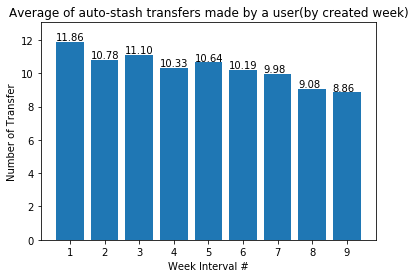

In [17]:
# Question 2b
aver_ast = eh_analysis_01.average_ast()
plt = eh_analysis_01.make_bar_plot(aver_ast)
plt.xlabel('Week Interval #')
plt.ylabel('Number of Transfer')
plt.title("Average of auto-stash transfers made by a user(by created week)")
plt.show()


From plot above, we find that the overall trend for the average of auto-stash transfer each user made goes downward as the time goes. But, as we indicate in previous section, the week interval 6, 7, 8 and 9 contained more users, so actually there are larger number of users transfer to auto-stash tranfers in week interval 6,7,8,9 than that in week interval 6,7,8,9. But, for business insight, we should study why the percentage of user decreased. I think the decrease is caused by that more and more users terminated auto-stash transfer after using few times in each enhort as the time goes, which drags down the average transfers made. 

Knowing how active the users are during the transaction record period, now we are going to further evaluate activity of the users in each enhort used auto-stash transfer in days by calculating the average frequency of transfers in days. **(Questiones 2c)**

We measure the value in two steps. First, we are going to measure the average transfer frequency in day for each user. The equation used to calculate this average is: 

**Average Transfer Frequency in Day = Total number of transfer made during recorded period / recorded period**

*Recorded period = Number of days between the date the account was created and the date the last auto-stash transfer *

After we calculate the average transfer frequency in Day for each user, we calculated the mean of the average transfer frequency of the users in each enhort. The equation should:

** Average Transfer Frequency in Day of Each Enhort = Sum of the average Transfer Frequency in Day in an enhort / the number of users in an enhort **

The calculated average transfer frequency in day for each enhort will be presented in a bar plot.

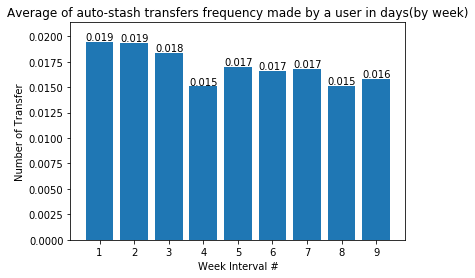

In [18]:
# Question 2c
aver_freq_ast = eh_analysis_01.average_freq_ast()
plt = eh_analysis_01.make_bar_plot(aver_freq_ast)
plt.xlabel('Week Interval #')
plt.ylabel('Number of Transfer')
plt.title("Average of auto-stash transfers frequency made by a user in days(by week)")
plt.show()

As we see from the graph above, the average frequency of each enhort are all between 0.015 - 0.02 per day. In the first four week interval, we catch a small downward trend. After that, the average goes back 0.017 level and stays stable. Sudden fall is caught at week interval 4 and 8, which matches the fact that both percentage of users made auto-stash transfer and average use of auto-stash transfer have sudden fall in week 4 and 8.

In the following session, we will measure the average increase in dollar value from one transfer to the next. It can effective help us to understand if the early stash users or the late stash users will have more resource to invest. **(Question 2d)**

The steps we took to calculate the average of auto-stash transfers was that:
    1. Calculate difference between previous and current transation each user made
    2. Calculate the mean of the difference in step 1 for each user (* the users only make one transation will be excluded for this step.)
    3. Calculate the average of the mean of the difference for the user in each enhort


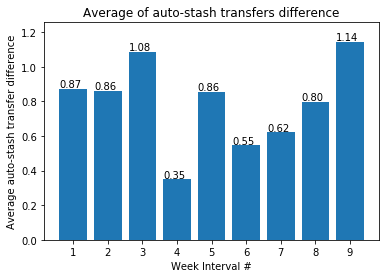

In [19]:
# Question 2d
aver_incr_ast = eh_analysis_01.average_increase_ast()
plt = eh_analysis_01.make_bar_plot(aver_incr_ast)
plt.xlabel('Week Interval #')
plt.ylabel('Average auto-stash transfer difference')
plt.title("Average of auto-stash transfers difference")
plt.show()

For graph above, we could look at the graph as two sub-graphs. The first 5 week intervals represents a period that the users with different investment power got into the market, so that the average amount of auto-stash transfer doesn't present a very smooth trend. The last 4 week intervals represented a good sign that more and more users started to trust in Stash and more investment came into the company. It proves a fact that as we don't give up marketing and standing in the market, customers or users will trust us and invest in us.

In the previous session, we see a good sign that more and more users start investing more in stash, even though there are some users stop using auto-stash transfer in the meanwhile (** Question 3 **). In the follow session, we will take a look at "churn rate" . **A churned user is one that has previously made an Auto-Stash transfer but has not made an additional transfer in over 30 days.** So, churn rate can indicate how much users we did't seize and might help us to understand what characters the user, who stopped auto-stash, had.

There are three kinds of users will be counted as churn users. 
    1. The users who didn't make transation during the 30 days after last transation.
    2. The users who only made one auto-stash transation.
    3. The users whose last transation date was more than 30 days far from the end of the last auto-stash transfer record date

In [20]:
# Question 3
churn_rate_wk = eh_analysis_01.calculate_churn_rate()

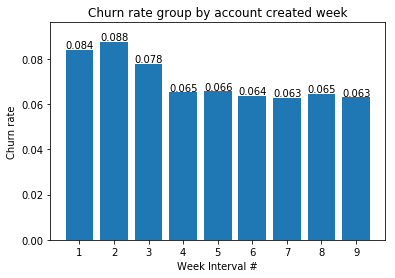

In [21]:
plt = eh_analysis_01.make_bar_plot(churn_rate_wk)
plt.xlabel('Week Interval #')
plt.ylabel('Churn rate')
plt.title("Churn rate group by account created week")
plt.show()

From the plot, we can see a good sign that the churn rate is going down as the time went, and being stable to be around 6%. In the future, we could study about what characters churn users had and designed strategy to bring back those users!

In the following, we will answer the questions we do for the week enhort, but on the age enhort. There is one things need to be set up is the age interval. The way we defined the age interval is by finding the min and max of the users, then divide the age range into groups, whose length is 10. The age intervals we define is shown below.

In [22]:
# Question 4
eh_analysis_01.gp_user_by_age()
print("The age intervals we defined for this project was:")
print(eh_analysis_01.age_gap)

The age intervals we defined for this project was:
[15 25 35 45 55 65 75 85]


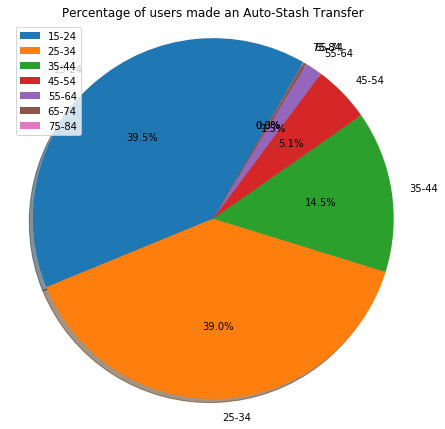

In [23]:
num_ast_enhortly = []
for i in range(len(eh_analysis_01.user_id_by_parameter)):
    num_ast_enhortly.append(len(eh_analysis_01.user_id_by_parameter[i][1]))
plt.figure(figsize=(6,6))
plt.pie(
    num_ast_enhortly,
    labels=["15-24","25-34","35-44","45-54","55-64","65-74","75-84"],
    shadow=True,
    startangle=60,    # rotate conter-clockwise by 60 degrees
    autopct='%1.1f%%',# display fraction as percentage
    )

plt.title('Percentage of users made an Auto-Stash Transfer')
plt.legend(fancybox=True)
plt.axis('equal')     # plot pyplot as circle
plt.tight_layout()
plt.show()


From the plot, we can see that the age of more than half the users signed up for Stash is between 15 to 35, which implied Stash's business idea is more attrative to the ones, who are more adoptable to new style of investment or new technology. 

**Since we have already described the methods we use to evaluate the questions in the previous session, we will not repeat the methods again, and will present the result in a grouped plot following with discussion.**

In [24]:
fig  = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

In [25]:
# Question 4a

pert_by_wk  = eh_analysis_01.percentage_user_mk_ast()
ax1 = eh_analysis_01.make_bar_plot_gp(pert_by_wk,ax1)
ax1.set_xlabel('Age Interval #',fontsize = 15)
ax1.set_ylabel('Percentage in decimal',fontsize = 15)
text = ax1.set_title("4a.Percentage of Users makes auto-stash transfer(by age group)",fontsize = 15)

In [26]:
# Question 4b
aver_ast = eh_analysis_01.average_ast()
ax2 = eh_analysis_01.make_bar_plot_gp(aver_ast,ax2)
ax2.set_xlabel('Age Interval #',fontsize = 15)
ax2.set_ylabel('Number of Transfer',fontsize = 15)
text = ax2.set_title("4b.Average of auto-stash transfers made by a user(by age group)",fontsize = 15)


In [27]:
# Question 4c
aver_freq_ast = eh_analysis_01.average_freq_ast()
ax3 = eh_analysis_01.make_bar_plot_gp(aver_freq_ast,ax3)
ax3.set_xlabel('Age Interval #',fontsize = 15)
ax3.set_ylabel('Number of Transfer',fontsize = 15)
text = ax3.set_title("4c.Average of auto-stash transfers frequency made by a user in days(by age group)",fontsize = 15)


In [28]:
# Question 4d
aver_incr_ast = eh_analysis_01.average_increase_ast()
ax4 = eh_analysis_01.make_bar_plot_gp(aver_incr_ast,ax4)
ax4.set_xlabel('Age Interval #',fontsize = 15)
ax4.set_ylabel('Average auto-stash transfer difference',fontsize = 15)
text = ax4.set_title("4d.Average of auto-stash transfers difference(by age group)",fontsize = 15)


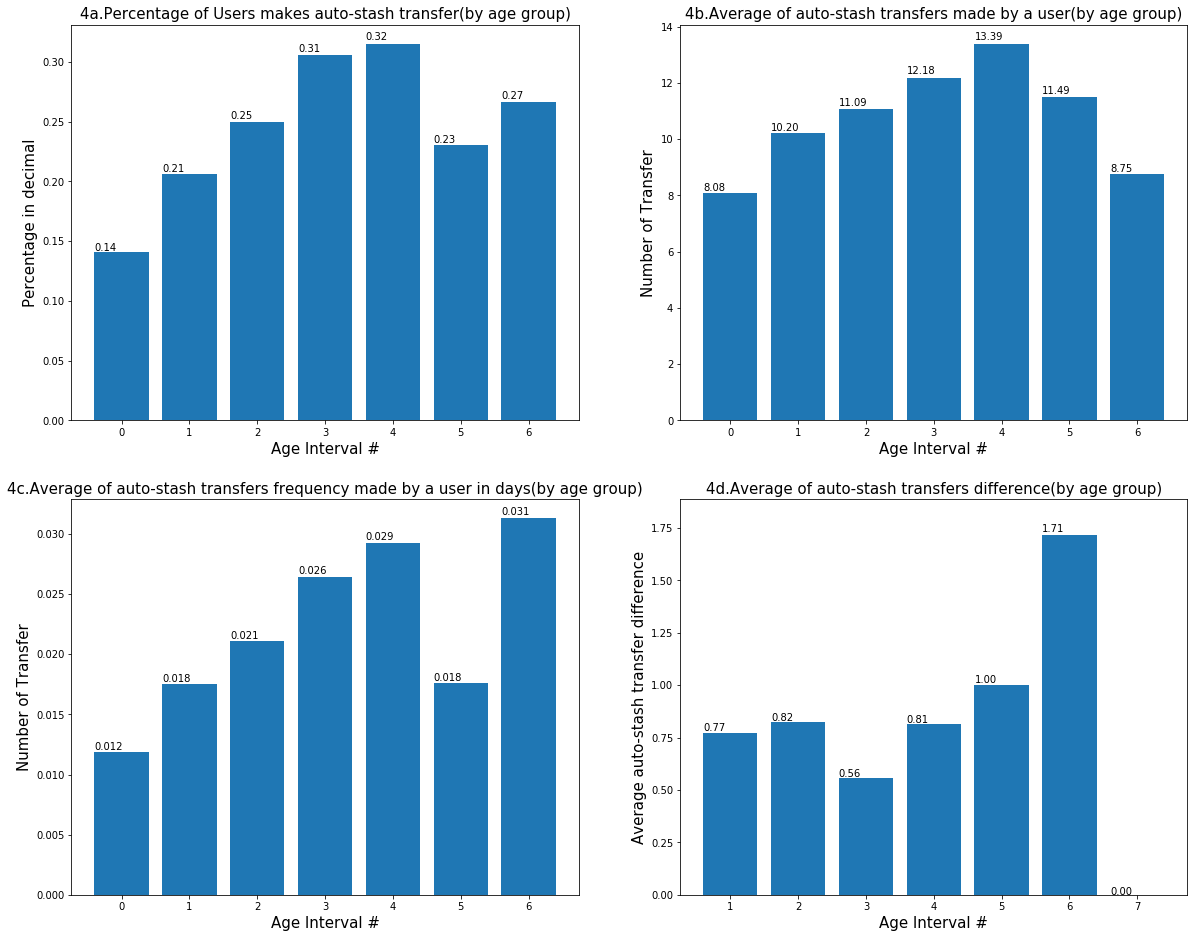

In [29]:
plt.show()

From upper plots, we can find that age interval 3 and 4 have high percentage of users make auto-stash transfer and the users make more auto-stash transfer on average, which implies that the users, whose age is between 55 and 75 are more tended to make auto-stash transfer and make more transfer than the users in other age group. I think the reason is that users in 55-75 age group, who will sign up for stash, should be more adaptable to the new technology than other persons in the same age range, and have more money to invest. However, due to the large numebr of users in 15 - 35 age group, we can also conclude that more users in 15-35 are interested in Stash invest than the users in other age group, but because of some reasons(no stable income, weak investment motivation), they don't choose to make auto-stash transfer. This can be a great toptic to explore in the future. 

From the lower left plot, we observed similar distribution with the one we saw in the upper left plot. Here, we could draw similar conclusion that users, who are between age 55 and 75, had more money to invest, which is also proved by the lower right plot. We can see that the users with higher age tend to make invest more and they will stack up their investment after they get familiar with Stash. One odd is also spotted in the plot. A zero average of auto-stash transfer increase of age is at interval 7. According to the way we calculate the average, the reason why the average is zero is that most of users in interval 7(age 75-84) only make one transation and then quit the service.

In [30]:
# Question 5

In the session, we will group by the users by their resident states. Instead of grouping the users by their states, we add one more factor into consideration, the average household income. Intuitively, the higher income a family has, the more power a family has to invest and use for its own desire. Therefore, for this question, we would rank the state by the average household income, and put the states according the ranked average household income into bins. For example, the states with average household income between  60,000 to 65,000 are put into one bin. One thing to clarify, the data of average household income is from the following link:
https://www.census.gov/content/dam/Census/library/publications/2017/acs/acsbr16-02.pdf.



The average household income intervals is define by the min and max average household income and divide the income range into sub-intervals, whose length is 10000. The average household income interval is: 

In [31]:
eh_analysis_01.gp_user_by_state()
eh_analysis_01.salary_range

array([20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000,
       65000, 70000, 75000])

The number of states in each interval is shown in the following plot.

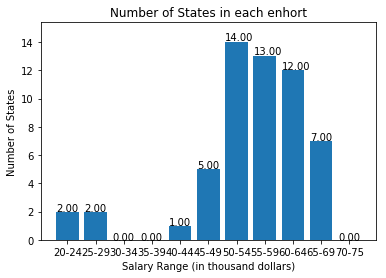

In [32]:
num_ast_enhortly = []
for i in range(len(eh_analysis_01.state_gap)):
    num_ast_enhortly.append(len(eh_analysis_01.state_gap[i][1]))

plt.figure(figsize=(12,12))
f,ax = plt.subplots()    
plt = eh_analysis_01.make_bar_plot(num_ast_enhortly)
plt.xticks(np.arange(len(num_ast_enhortly)),('20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-75'))
plt.xlabel('Salary Range (in thousand dollars)')
plt.ylabel('Number of States')
plt.title("Number of States in each enhort")
plt.show()

It is not hard to tell that most of states concentrate at the salary range of 45000 and 70000. Let's take a look at how the users distribute among the intervals.

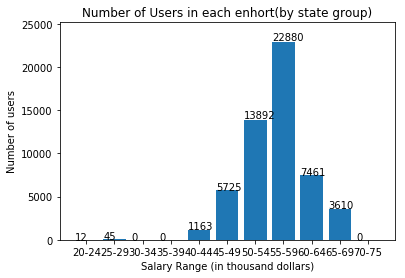

In [33]:
num_ast_enhortly = []
for i in range(len(eh_analysis_01.user_id_by_parameter)):
    num_ast_enhortly.append(len(eh_analysis_01.user_id_by_parameter[i][1]))

plt.figure(figsize=(12,12))
f,ax = plt.subplots()    
plt = eh_analysis_01.make_bar_plot(num_ast_enhortly)
plt.xticks(np.arange(len(num_ast_enhortly)),('20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-75'))
plt.xlabel('Salary Range (in thousand dollars)')
plt.ylabel('Number of users')
plt.title("Number of Users in each enhort(by state group)")
plt.show()

As we can saw that the distribution of the users seemed to follow gaussian distribution, with mean at around 8. More than half of the users live in the states with salary around 45000 to 65000.

In [34]:
fig  = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

In [35]:
# Question 5a
pert_by_wk  = eh_analysis_01.percentage_user_mk_ast()
ax1 = eh_analysis_01.make_bar_plot_gp(pert_by_wk,ax1)
ax1.set_xlabel('Geographic Interval #',fontsize = 15)
ax1.set_ylabel('Percentage in decimal',fontsize = 15)
text = ax1.set_title("5a.Percentage of Users makes auto-stash transfer(by state Group)",fontsize = 15)


In [36]:
# Question 5b
pert_by_wk  = eh_analysis_01.average_ast()
ax2 = eh_analysis_01.make_bar_plot_gp(pert_by_wk,ax2)
ax2.set_xlabel('Geographic Interval #',fontsize = 15)
ax2.set_ylabel('Number of auto-stash transfer',fontsize = 15)
text = ax2.set_title("5b.Average of auto-stash transfers made by a user(by state group)",fontsize = 15)


In [37]:
# Question 5c
pert_by_wk  = eh_analysis_01.average_freq_ast()
ax3 = eh_analysis_01.make_bar_plot_gp(pert_by_wk,ax3)
ax3.set_xlabel('Geographic Interval #',fontsize = 15)
ax3.set_ylabel('Number of auto-stash transfer',fontsize = 15)
text = ax3.set_title("5c.Average of auto-stash transfers frequency made by a user in days(by state group)",fontsize = 15)


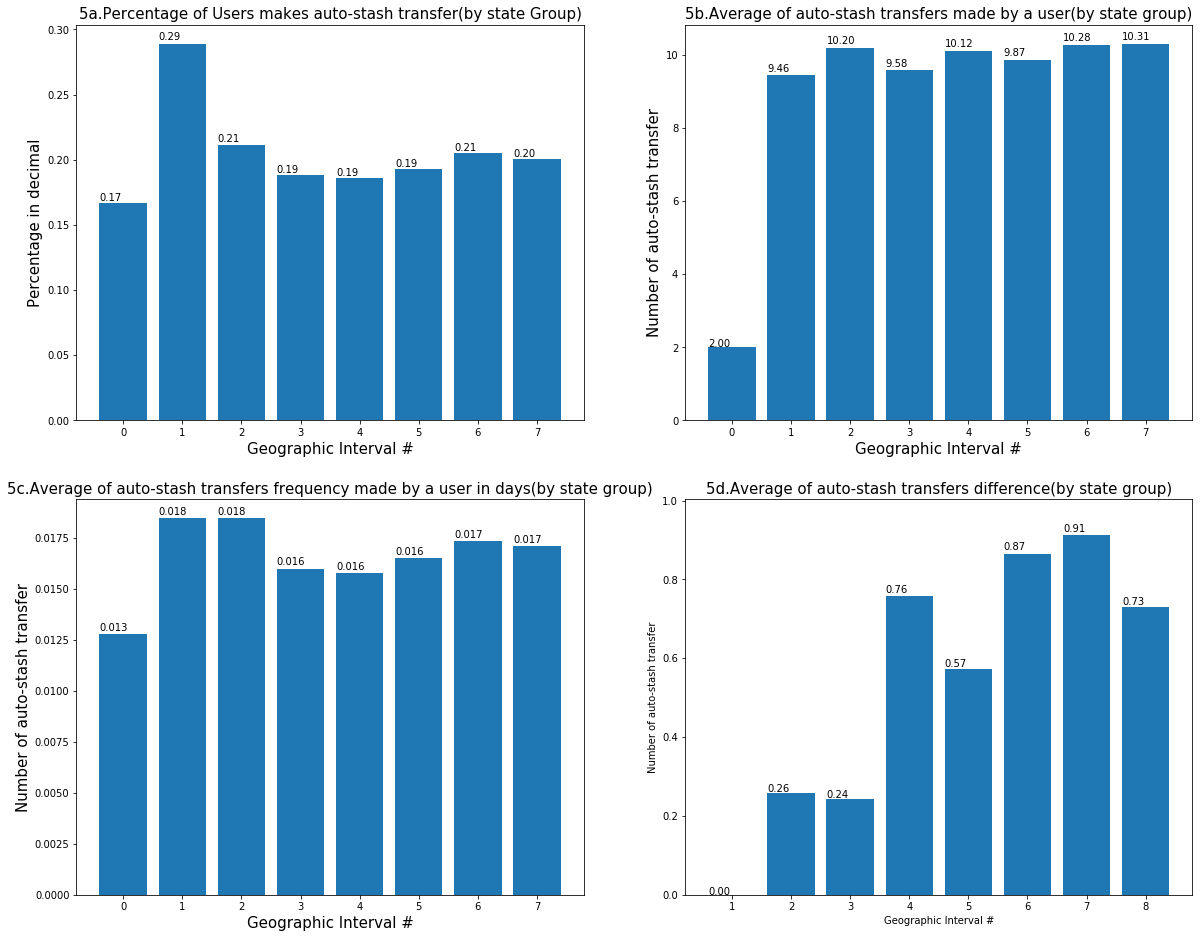

In [38]:
# Question 5d
pert_by_wk  = eh_analysis_01.average_increase_ast()
ax4 = eh_analysis_01.make_bar_plot_gp(pert_by_wk,ax4)
ax4.set_xlabel('Geographic Interval #')
ax4.set_ylabel('Number of auto-stash transfer')
text = ax4.set_title("5d.Average of auto-stash transfers difference(by state group)",fontsize = 15)
plt.show()

From the upper left plot, we see that the percentage of users make auto-stash transfer is between 19% to 20%. Only the users lived in state with average household income of 20-24k and 25-29k are out of range. We should further study the users in interval 1 and 2 finding what made they dislike and like about auto-stash transfer. 
From the upper right plot and the lower left plot, we saw that the users lived in the states with lowest average income made less auto-stash transfers and used auto-stash transfers with low frequency. 
Form the lower right plot, we can easily tell that the users lived in state with higher average income are more tended to increase their investment in auto-stash transfer. 
I think the study above is a good example indicates that the users with high income will be more tended to use auto-stash transfer and increase their investment as well. 


## Who will be auto-stash transfer users and Who will be churn users ?
** (Question 6) **
Auto-stash transfer is a very useful function for Stash Invest. Studying the behavior of users who used and didn't use auto-stash transfer can bring valuable insights about who would make auto-stash transfer. In addition, if we can estimate what percentage of the user would make auto-stash transfer, and what percentage of auto-stash transfer users may stop using auto-stash transfer, we can possibly estimate the amount of investment all our users will make in a certain period of time, such as every week. To approach our goal, we are going to apply machine learning tools and data visualization to find out the hidden information and transform it into business insights. 

There are two main parts in this section. First, we will try to predict who will use auto-stash transfer users from the user data amd some information generated from the user data. After then, we will fit another model to predict which users will transfer from auto-stash transfer users to churn users. In the meanwhile, we will experience data manipulation, feature selection, model fitting and model evaluation. 

<img src="ast_user.png">

### Data Preparation for Modeling

Before fitting a model, we will need to generate some useful data for the prediction. We add four variables into our user data, which are,
    1. is_ast: whether the users used auto-stash transfer
    2. age: the age of the users when created the account
    3. is_ios: whether the users used ios or not
    4. Real Income: the average household income of the users' resident state
    5. state_id: the alphabet rank of the users' resident state
From the study above, we know that users in certain age range (15-35 years old) and the users live in certain states(the states with average household income between 45k-60k) are more tended to make auto-stash transfer, so we will use the age, the state, the average household income of the users' resident state as the variables for model fitting. 

In [3]:
# Add the variables mentioned to our dataset
eh_analysis_01.gp_user_by_age()
eh_analysis_01.user_data['is_ast'] = eh_analysis_01.user_data.id.isin(eh_analysis_01.as_tf_data.user_id)
eh_analysis_01.user_data['is_ios'] = eh_analysis_01.user_data.platform.apply(lambda x:x=='ios')
eh_analysis_01.state_aver_income['state_id'] = eh_analysis_01.state_aver_income.state.index.get_level_values(0) + 1

study_data = pd.merge(eh_analysis_01.user_data,eh_analysis_01.state_aver_income[['state','Real Income','state_id']],how='left',on='state')
study_data = study_data[study_data.account_state == 'complete']
study_data.head()

,id,account_state,risk_level,date_of_birth,state,zipcode,platform,created_at,age,is_ast,is_ios,Real Income,state_id
0,329581,complete,2,1987-06-29,CA,95037,android,2016-07-13 14:44:29.976171,29,False,False,56878.0,5.0
1,396,complete,2,1990-08-17,KY,42001,android,2016-07-09 10:19:22.346926,25,False,False,51033.0,17.0
2,2131,complete,2,1987-03-27,PA,17856,ios,2016-07-02 15:20:59.104448,29,False,True,56897.0,38.0
3,330605,complete,1,1996-04-04,IN,46033,ios,2016-07-13 21:53:57.922888,20,False,True,55713.0,14.0
4,330616,complete,3,1983-10-04,CA,92114,android,2016-07-13 21:54:05.984380,32,False,False,56878.0,5.0


### Feature Selection
Before implementing the selected data in our first fitting, we should evaluate how importance of each variable to the our target. Because unrelevant variables used in model fitting may cause over-fitting and heavy calculation, we should perform features selection to filter out unrelevant data

In order to find out which features are important to the target we aimed to predict, we would evaluate the feature importance of our vairable and select the variable with high feature importance for model fitting. 

In [5]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(study_data[['risk_level','is_ios','Real Income','state_id','age']], study_data.is_ast)
# display the relative importance of each attribute
print("Feature importance under Random Forest Classifer :")
print(model.feature_importances_)

Feature importance under Random Forest Classifer :
[ 0.10485496  0.01531719  0.15113812  0.14770892  0.58098081]


From the result above, we can see that under Random Forest Classifer, the feature, which is the most relevant variables to our target are 'age' variable, then 'Real Income', 'state_id', and 'risk level'. Due to the relativly low feature importance, the 'is_ios' feature is eliminated for the model fitting. The result is quite intuitive because a user with higher risk level and high income implied that he or she may have more capacity to invest and take more risk. 

With the finding from feature selection, let's take a look at how a variable can be relative to each others. First, we will look at the relation between risk_level and age by plotting them in a scatter plot, and color them whether they are auto_stash transfer users. 

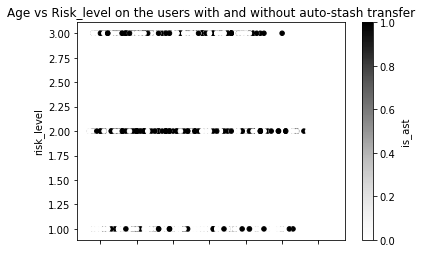

In [6]:
study_data.plot.scatter(x='age',y='risk_level',c='is_ast')
plt.xlabel('age')
plt.title('Age vs Risk_level on the users with and without auto-stash transfer')
plt.show()

As a result, we don't see a very obvious separation between auto-stash transfer users and non auto-stash transfer users. But, we see that more auto-transfer users(black dots) clustered at risk level 2,3, and auto-transfer users(white dots) are clustered at risk level 1, which may confirm my assumption that a user with higher risk had more capacity to invest.

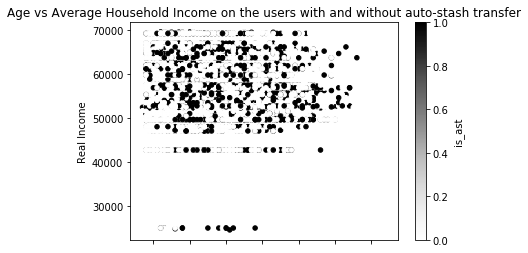

In [7]:
study_data.plot.scatter(x='age',y='Real Income',c='is_ast')
plt.xlabel('age')
plt.title('Age vs Average Household Income on the users with and without auto-stash transfer')
plt.show()

From the graph abover, we don't find an obvious separation and concentrated cluster. In addition, the white and dark dots are crowded with each other, which indicated that they might not be easily classified. In order to reduce the calculation in modeling, and make classification easier, we will perform feature dimensions reduction.

### Feature Dimensions Reduction
Principal Component Analysis(PCA) is a method to reduce feature dimensions and extract the most information (variance) from the least number of variables. With sklearn, we can easily applied PCA, and found out which direction contains the most variance of data.

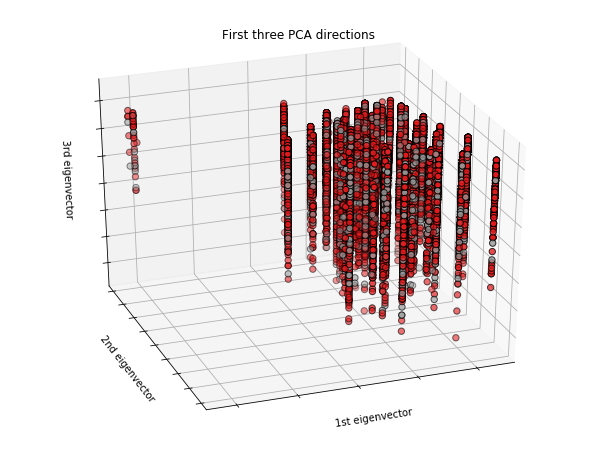

In [4]:
from sklearn import svm
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(study_data[['risk_level','age','Real Income','state_id']])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=study_data.is_ast,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

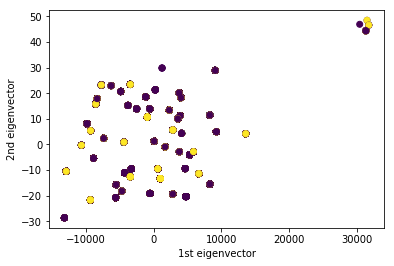

In [5]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=study_data.is_ast)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.show()

The scatter graph above shows that the two eigenvectors that is corresponded to the two maximum eigenvalues. We can see that the auto-stash transfer users and non-auto-stash transfer users are more separable than we could see in the scatter graph we see before. These two vectors may not contain all the information in the dataset, but now we can used only three columns out of four columns that would contain more 75% of information and reduced more than 25% calculation in model fitting. Now, we are ready for the modeling.

### Model Fitting & Selection

For the modeling, we choose logistic regression and support vector machine as our classifer. We will compare their performance and use the one with better performance for future study. From the feature importance study, we decide the variable we will use for modeling are 'age', 'Real Income', 'state_id', and 'risk level' of the users. Let's start our first round modeling.

**Logistic Regression on the whole dataset**

In [45]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
LR1 = LR(solver = 'liblinear')
LR1.fit(study_data[['risk_level','age','Real Income','state_id']], study_data['is_ast'])
predictions = LR1.predict(study_data[['risk_level','age','Real Income','state_id']])
score = LR1.score(study_data[['risk_level','age','Real Income','state_id']], study_data['is_ast'])
print("The acruracy of training set: {0:.1f} %".format(score*100))

The acruracy of training set: 80.6 %


**Support Vector Machine on the whole dataset**

In [46]:
# clf = SVC(kernel= 'rbf')
# clf.fit(study_data[['risk_level','age','Real Income','state_id']],study_data.is_ast)
# svm_score = clf.score(study_data[['risk_level','age','Real Income','state_id']],study_data.is_ast)
# print("The acruracy of training set:{0:.1f} %".format(svm_score*100))

Compared the accuracy of two models, we can see that both models had similar performance, but the efficiency of  logistic regression is much better than SVM model (liked 1 second to 3 minutes ). So, we will choose logistic regression for the following study. 

Next, we are going to use dimensions-reduced variables for model fitting to see if the dimensions-reduced variables can capture the most of information.

In [47]:
from sklearn.linear_model import LogisticRegression as LR
LR2 = LR(solver = 'liblinear')
num_training = len(X_reduced)
LR2.fit(X_reduced[0:int(0.75*num_training),0:2], study_data['is_ast'].iloc[0:int(0.75*num_training)])
score_trainset = LR2.score(X_reduced[0:int(0.75*num_training),0:2], study_data['is_ast'].iloc[0:int(0.75*num_training)])
score_testset = LR2.score(X_reduced[int(0.75*num_training):,0:2], study_data['is_ast'].iloc[int(0.75*num_training):])
print("The acruracy of training set with dimensions-reduced variables:{0:.1f} %".format(score_trainset*100))
print("The acruracy of testing set with dimensions-reduced variables:{0:.1f} %".format(score_testset*100))

The acruracy of training set with dimensions-reduced variables:80.7 %
The acruracy of testing set with dimensions-reduced variables:80.1 %


We can see that using dimensions-reduced variables, we achieve almost the same accuracy with the dataset had the size that is 75% of the original data'size. Moreover, we see that the accuracy on training and testing set are almost the same, which indicates that the model is not over-fitting. 

In order to know more about why our model could make 20% misclassification. Let's dig deeper to see how our model performed by plotting the prediction into a confusion matrix.

Confusion matrix, without normalization


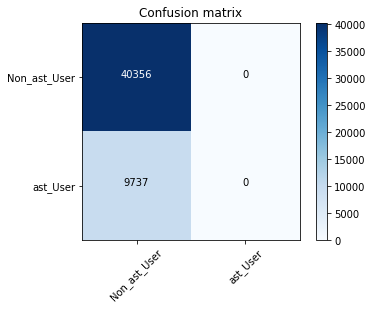

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=predictions, y_true=study_data.is_ast)
classes = ['Non_ast_User','ast_User']
plt.figure()
eh_analysis_01.plot_confusion_matrix(cm,classes)
plt.show()

From the confusion matrix, we can see that the model don't have good ability to recongnize who will be auto-stash transfer user, but have over capacity to recongnize who will not use auto-stash transfer. The reason I thought the model will "liked" the non-auto-stash transfer users so much is that more users(81% users) tended to not use auto-stash transfer in the dataset, and the variables don't contain sufficient info to correctly classify, who will be the auto-stash transfer. In order to improve the classification performance, we can apply support vector machines in future with low gamma, and high penalty (C) to extract out the auto-stash transfer users.

Next, we will repeat the procedure above to find out who will transfer from auto-stash transfer users to churn users. There will be less description about what each step is doing, and we will focus on discussion. We will add the following variable into the user_data:
    1. num_of_tf: the total number of transfer made by a user
    2. aver_freq: the average frequency of auto-stash transfer by a user
    3. aver_ast_diff: the average increase every auto-stash transfer for a user

In [49]:
eh_analysis_01.user_data.head()

,id,account_state,risk_level,date_of_birth,state,zipcode,platform,created_at,is_churn,age,is_ast,is_ios
0,329581,complete,2,1987-06-29,CA,95037,android,2016-07-13 14:44:29.976171,False,29,False,False
1,396,complete,2,1990-08-17,KY,42001,android,2016-07-09 10:19:22.346926,False,25,False,False
2,2131,complete,2,1987-03-27,PA,17856,ios,2016-07-02 15:20:59.104448,False,29,False,True
3,330605,complete,1,1996-04-04,IN,46033,ios,2016-07-13 21:53:57.922888,False,20,False,True
4,330616,complete,3,1983-10-04,CA,92114,android,2016-07-13 21:54:05.984380,False,32,False,False


In [50]:
# eh_analysis_01.user_data['num_of_tf'] 
user_data = study_data.rename(columns = {'id':'user_id'})
user_data = user_data[user_data.is_ast == True]
aver_tf_freq = eh_analysis_01.average_freq_ast_per_user()
aver_ast_incr = eh_analysis_01.average_increase_ast_per_user()
user_data = pd.merge(user_data,aver_tf_freq, how='left',on='user_id')
user_data = pd.merge(user_data,aver_ast_incr, how='left',on='user_id')

user_data = user_data.rename(columns = {'total_transfer':'num_of_tf'})
user_data.head()

,user_id,account_state,risk_level,date_of_birth,state,zipcode,platform,created_at,is_churn,age,is_ast,is_ios,Real Income,state_id,num_of_tf,use_days,aver_freq,aver_ast_diff
0,330612,complete,2,1995-01-09,CA,90063,ios,2016-07-13 21:55:16.503401,False,21,True,True,56878.0,5.0,9,166,0.054217,0.0
1,330618,complete,1,1985-01-14,MD,21102,ios,2016-07-13 22:03:42.289582,False,31,True,True,69203.0,20.0,1,8,0.125000,NaN
2,330647,complete,2,1975-10-28,NC,27604,ios,2016-07-13 22:07:32.934581,True,40,True,True,52445.0,33.0,5,140,0.035714,0.0
3,332033,complete,2,1966-06-25,NC,28451,ios,2016-07-14 11:16:27.527917,True,50,True,True,52445.0,33.0,3,162,0.018519,5.0
4,17137,complete,2,1991-09-10,TX,78201,ios,2016-06-01 08:13:45.194401,True,24,True,True,57493.0,43.0,2,180,0.011111,0.0


After we had the data ready, we will start the same procedure as we did in the previous session, feature selection and model fitting. 

In [51]:
model = RandomForestClassifier()
model.fit(user_data[['risk_level','is_ios','Real Income','state_id','age','num_of_tf','aver_freq']], user_data.is_churn)
# display the relative importance of each attribute
print("Feature importance under Random Forest Classifer :")
print(model.feature_importances_)

Feature importance under Random Forest Classifer :
[ 0.02492382  0.01333436  0.07598056  0.07419021  0.1316659   0.23114168
  0.44876348]


As we can see from the result, the variable contribute the most infomation to our target is average auto-stash transfer frequency, then the second and the third important variables are uesrs' age and number of auto-transfer transfer a user made.

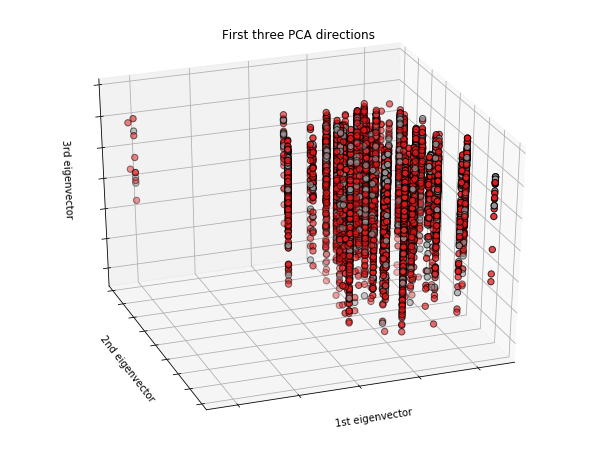

In [52]:
from sklearn import svm
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=5).fit_transform(user_data[['risk_level','is_ios','Real Income','state_id','age','num_of_tf','aver_freq',]])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=user_data.is_churn,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

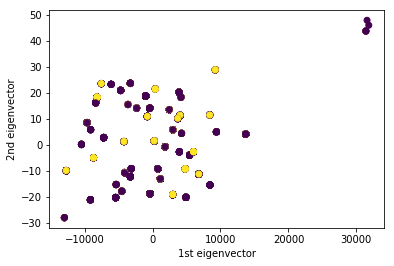

In [53]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=user_data.is_churn)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression as LR

LR1 = LR(solver = 'liblinear')
LR1.fit(user_data[['risk_level','is_ios','Real Income','state_id','age','num_of_tf','aver_freq']], user_data['is_churn'])
predictions = LR1.predict(user_data[['risk_level','is_ios','Real Income','state_id','age','num_of_tf','aver_freq']])
score = LR1.score(user_data[['risk_level','is_ios','Real Income','state_id','age','num_of_tf','aver_freq']], user_data['is_churn'])
print("The acruracy on the whole dataset: {0:.1f} %".format(score*100))

The acruracy on the whole dataset: 76.5 %


From the model selection result above, the variables we would keep for modeling are :

In [55]:
from sklearn.linear_model import LogisticRegression as LR
LR2 = LR(solver = 'liblinear')
num_training = len(X_reduced)
training_perc = 0.9
num_variable = 3
LR2.fit(X_reduced[0:int(training_perc*num_training),0:num_variable], study_data['is_churn'].iloc[0:int(training_perc*num_training)])
score_trainset = LR2.score(X_reduced[0:int(training_perc*num_training),0:num_variable], user_data['is_churn'].iloc[0:int(training_perc*num_training)])
score_testset = LR2.score(X_reduced[int(training_perc*num_training):,0:num_variable], user_data['is_churn'].iloc[int(training_perc*num_training):])
print("The acruracy of training set with dimensions-reduced variables:{0:.1f} %".format(score_trainset*100))
print("The acruracy of testing set with dimensions-reduced variables:{0:.1f} %".format(score_testset*1))

The acruracy of training set with dimensions-reduced variables:76.6 %
The acruracy of testing set with dimensions-reduced variables:0.8 %


Confusion matrix, without normalization


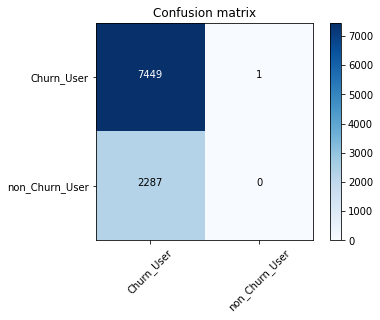

In [56]:
cm = confusion_matrix(y_pred=predictions, y_true=user_data.is_churn)
classes = ['Churn_User','non_Churn_User']
plt.figure()
eh_analysis_01.plot_confusion_matrix(cm,classes)
plt.show()

From the confusion matrix, we can see that the model doesn't have good ability to recongnize who will be churn users, but have over capacity to recongnize who will quit auto-stash transfer after using it. From the accuracy and the confusion matrix, we see that the model is over-fitting on the training set, which causes low accuracy on the testset. The reasons causes the under-performace could be the following:
    1. Small data set (8000+ rows)
    2. Dataset had bias (data contains relativly small number of churn users to non-churn users)
    3. Logistic regression was not good at classifying non-separable dataThe reason I thought the model would
 

## -Conclusion-

In this project, we use data visualization, statistical modeling, and programming to analyze stash users's data and are able to get some interesting insights. Here are some shareing:
    1. The age of 78.5% of the users made auto-stash transfer is between 15 and 35.
    2. The users lived in the states with average household income between 50k and 60k are more tended to make auto-stash transfer
    3.The users, who with age of 55-75 and made auto-stash transfer, have great investment ability. 
    
Besides the business insights, we also get some statistical insights about the data. For example. we find that age, risk level, state average household income of users were useful characters to predict if a user will make auto-stash transfer or not. Moreover, we find that if we want to know if a auto-stash transfer user will become a churn user, average auto-stash transfer frequency, age, and total number of auto-stash transfer can provide useful reference. 

For the improvement and future study, I have a list of suggestion: 
    1. Use less bias data, for example, dataset contains 50% of auto-stash transfer users and 50% non-auto-stash transfer users. It will help to build a less bias model.
    2. Collect more characters of users, such as income, gender, whether own a house. More characters will improve the model and reduce the bias in the model
    3. Apply Support Vector Machine or Ramdom Forest Classiifer. These model can come with better classification performance with heavy calculation. They are also good at dealing with the dataset with high variance. 

At the end, I want to thank you for the assignment. The assignment became more and more interesting as I got into it. And I believe that there will be much more information hidden in the dataset. But, due to the time contraint, my exploration can not go further. I really hope that I could work with more data and continue my study in Stash. So, if you have any question regarding this project, please feel free to contact and I will be more than happy to discuss with you. Again, Thank you for the assignment & Look forward to talking with you in Stash

In [57]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import GradientBoostingClassifier
# clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,max_depth=1, random_state=1)
# scores = cross_val_score(clf, X_reduced[:,0:2], user_data['is_churn'], cv=5)
# scores 


In [58]:
user_data[user_data.is_churn == True]

,user_id,account_state,risk_level,date_of_birth,state,zipcode,platform,created_at,is_churn,age,is_ast,is_ios,Real Income,state_id,num_of_tf,use_days,aver_freq,aver_ast_diff
2,330647,complete,2,1975-10-28,NC,27604,ios,2016-07-13 22:07:32.934581,True,40,True,True,52445.0,33.0,5,140,0.035714,0.000000
3,332033,complete,2,1966-06-25,NC,28451,ios,2016-07-14 11:16:27.527917,True,50,True,True,52445.0,33.0,3,162,0.018519,5.000000
4,17137,complete,2,1991-09-10,TX,78201,ios,2016-06-01 08:13:45.194401,True,24,True,True,57493.0,43.0,2,180,0.011111,0.000000
12,50883,complete,1,1998-04-20,MO,64014,ios,2016-07-24 16:11:06.231262,True,18,True,True,56258.0,25.0,13,158,0.082278,0.000000
24,330760,complete,2,1991-11-29,FL,33647,ios,2016-07-13 22:54:46.394825,True,24,True,True,49674.0,9.0,17,167,0.101796,-0.312500
28,264741,complete,2,1966-02-10,CA,90250,android,2016-06-04 05:30:26.184185,True,50,True,False,56878.0,5.0,12,202,0.059406,3.636364
31,103666,complete,3,1987-04-28,CA,90036,ios,2016-07-09 20:47:38.420982,True,29,True,True,56878.0,5.0,11,108,0.101852,0.000000
32,332065,complete,2,1989-06-11,TX,78756,android,2016-07-14 11:44:35.187665,True,27,True,False,57493.0,43.0,2,166,0.012048,0.000000
34,330808,complete,3,1981-08-09,CT,6614,ios,2016-07-13 23:15:24.636282,True,34,True,True,65636.0,7.0,11,112,0.098214,0.000000
35,332061,complete,1,1996-08-15,LA,70710,android,2016-07-14 11:47:44.437387,True,19,True,False,50471.0,18.0,5,85,0.058824,-1.250000


In [59]:
# X_reduced = PCA(n_components=4).fit_transform(user_data[['risk_level','is_ios','Real Income','age','num_of_tf','aver_freq','state_id']])
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=user_data.is_churn)
# plt.xlabel('1st eigenvector')
# plt.ylabel('2nd eigenvector')
# plt.show()

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# clf = LinearDiscriminantAnalysis()
# # clf.fit(X_reduced[:,1:3], user_data.is_churn)
# scores = cross_val_score(clf, X_reduced[:,0:2], user_data['is_churn'], cv=5)
# scores 

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
from sklearn import svm
import matplotlib.pyplot as plt
C = 1.0  # SVM regularization parameter
# models = (svm.SVC(kernel='linear', C=C),
#           svm.LinearSVC(C=C),
#           svm.SVC(kernel='rbf', gamma=0.7, C=C),
#           svm.SVC(kernel='poly', degree=3, C=C))
models = [svm.SVC(kernel='rbf', gamma=0.7, C=C)]
X = X_reduced[:,0:2]
y = study_data.is_ast
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',)
#           'LinearSVC (linear kernel)',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_reduced[:, 0], X_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
y = user_data.is_churn
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [3]:
len(eh_analysis_01.user_data)

54797